## Bar Plot

### This plot shows the number of youth hostel available per State

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("/content/youth-hostel.csv",encoding='cp1252')
data.head()

,Name and Address of Manager & Warden,City,State,Phone
0,"Managed by State Govt., Youth Hostel, Aberdeen...",Port Blair,Andaman & Nicobar,NaN
1,"Manager In charge, Youth Hostel, Balaji Nagar,...",Kadapa,Andhra Pradesh,08562-356303
2,"Manager, Youth Hostel, Vizianagaram, Andhra Pr...",Vizianagaram,Andhra Pradesh,NaN
3,"Manager In charge, Youth Hostel, Door No. 7-24...",Vishakhapatnam,Andhra Pradesh,\n0891-2568437\n\n
4,"Manager In charge, Youth Hostel, 3rd Cross Roa...",Vijaywada,Andhra Pradesh,NaN


In [52]:
state_counts=data.groupby("State").size().reset_index(name="Count")

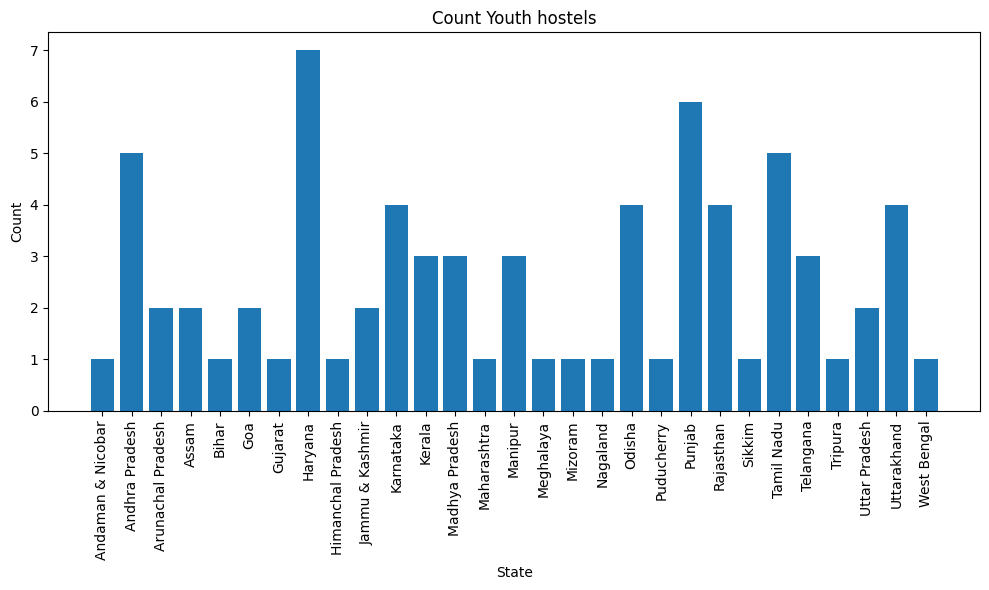

In [53]:
plt.figure(figsize=(10, 6))

plt.bar(state_counts["State"], state_counts["Count"])

plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count Youth hostels")


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Scatter Plot

### This plot shows the out of total people benefitted from Pradhan Mantri Awas Yojana how many belong to minorities population

In [54]:
data2 = pd.read_csv("/content/OGDSECCAwaasPlusData_18092023.csv",error_bad_lines=False)
data2.head()

<ipython-input-54-0c0993493752>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv("/content/OGDSECCAwaasPlusData_18092023.csv",error_bad_lines=False)
Skipping line 123834: expected 13 fields, saw 14

Skipping line 144073: expected 13 fields, saw 14
Skipping line 150631: expected 13 fields, saw 14



,state_code,state_name,District_Code,district_name,Block_Code,block_name,Panchayat_Code,panchayat_name,Minority,Others,SC,ST,Total
0,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6500.0,NANCOWRY,NaN,CHOWRA TC,0,0,0,6,6
1,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6499.0,NICOBAR,259313.0,TRIBAL COUNCIL,0,0,0,2,2
2,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234530.0,GOVINDNAGAR,25,130,0,0,155
3,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234529.0,CAMPBELL BAY,21,29,0,0,50
4,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234531.0,LAXMI NAGAR,9,46,0,0,55


In [ ]:
data2=data2.groupby('state_name').agg({'Others':'sum','Minority':'sum','SC': 'sum', 'ST': 'sum', 'Total': 'sum'}).reset_index()
data2 = data2[data2['Total'] > 0.5 * 10**6]
data2

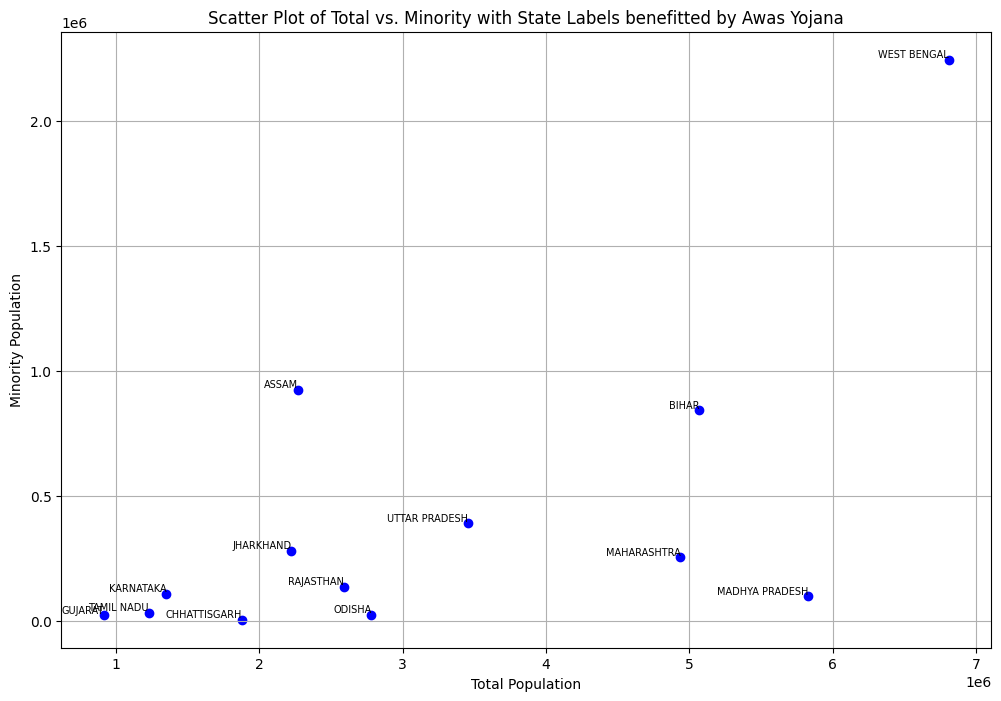

In [59]:
plt.figure(figsize=(12, 8))

for index, row in data2.iterrows():
    x = row['Total']
    y = row['Minority']
    state_name = row['state_name']

    threshold = 700
    if x > threshold or y > threshold:
        plt.scatter(x, y, label='', color='blue')
        plt.text(x, y, state_name, fontsize=7, ha='right', va='bottom')

plt.xlabel('Total Population')
plt.ylabel('Minority Population')
plt.title('Scatter Plot of Total vs. Minority with State Labels benefitted by Awas Yojana')
plt.grid(True)
plt.show()


## Box Plot

### This plot shows the % of vechiles and its variation across the states

In [85]:
path = "RTYB1819_A3_4e.csv"
df = pd.read_csv(path)
df.head()

df = df[df['States/Union Territories'] != 'Total']

df.head(10)


,States/Union Territories,Two wheelers (I) - Scooters,Two wheelers (I) - Mopeds,Two wheelers (I) - Motor cycles,Cars (II),Jeeps (III),Omni buses (IV),Tractors (V),Trailers (VI),Other vehicles not covered (VII),Total Non-Transport (I TO VII)
0,Andhra Pradesh,0.0,279850.0,9047038.0,730865.0,10524.0,29099.0,209399.0,134429.0,43283.0,10484487.0
1,Arunachal Pradesh,39405.0,3684.0,65170.0,67553.0,5228.0,39.0,1490.0,927.0,7134.0,190630.0
2,Assam,2633984.0,0.0,NaN,750228.0,0.0,1616.0,66285.0,28860.0,0.0,3480973.0
3,Bihar,0.0,35383.0,6502794.0,404481.0,152643.0,0.0,458114.0,225873.0,54840.0,7834128.0
4,Chhattisgarh,2933738.0,543049.0,1707998.0,353854.0,25187.0,60568.0,242939.0,131967.0,27567.0,6026867.0
5,Goa,963894.0,0.0,0.0,290540.0,0.0,0.0,3963.0,1.0,5156.0,1263554.0
6,Gujarat,15801542.0,2646829.0,0.0,3011656.0,195031.0,0.0,773221.0,393045.0,102809.0,22924133.0
7,Haryana,0.0,53440.0,5699857.0,276464.0,183115.0,373.0,453017.0,0.0,74162.0,6740428.0
8,Himachal Pradesh,824302.0,10436.0,0.0,414111.0,22411.0,2047.0,7810.0,110.0,120398.0,1401625.0
9,Jammu and Kashmir,226056.0,96534.0,613953.0,538554.0,15355.0,35974.0,NaN,896.0,15992.0,1571022.0


In [86]:
row_sums = df.iloc[:, 1:].sum(axis=1)
percentage_df = df.iloc[:, 1:].div(row_sums, axis=0) * 100

percentage_df = pd.concat([df['States/Union Territories'], percentage_df], axis=1)

df = pd.DataFrame(percentage_df)

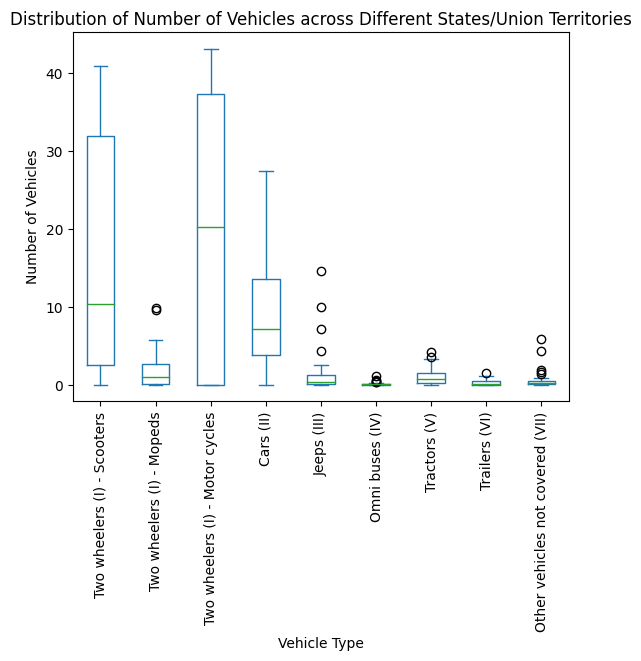

In [87]:
df.plot(kind='box', y=['Two wheelers (I) - Scooters',
                       'Two wheelers (I) - Mopeds',
                       'Two wheelers (I) - Motor cycles',
                       'Cars (II)',
                       'Jeeps (III)',
                       'Omni buses (IV)',
                       'Tractors (V)',
                       'Trailers (VI)',
                       'Other vehicles not covered (VII)'])
plt.title('Distribution of Number of Vehicles across Different States/Union Territories')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()